In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

Loading BokehJS ...

# Construction de la structure à partir de la minimisation géométrique

In [2]:
from imogolite.simulation.structure import minimizStructNTI

In [3]:
X, Y = 'Si', 'CH3'
n1, n2 = (9,9)
Ri, Re = 8.80,  13.60
T = 4.89
L = 20*T

In [4]:
m = minimizStructNTI.Config_nanotube(n1, n2, X, Y, Ri=Ri, Re=Re)

In [5]:
res = m.minimizeStructure()

Configuration minimisée en 0.16 s
Energie atteinte = 0.0296 mdyn A


In [6]:
narray, xyzarray = m.get_nxyzarray(L=200)

# Simulation DRX dans l'espace réciproque

In [9]:
from imogolite.simulation.xrd import drx3d
reload(drx3d)

<module 'imogolite.simulation.xrd.drx3d' from 'd:\\these\\programmes\\imogolite\\imogolite\\simulation\\xrd\\drx3d.py'>

## Calcul de la diffusion et sauvegarde

In [19]:
Ifun = drx3d.compute_DRX3D(narray, xyzarray, dQz=0.02, zsymmetry=True)

## Chargement depuis un fichier nc

In [10]:
Ifun = drx3d.from_nc(f'DRX3D-SiCH3_{n1}_{n2}.nc')

## Sauvegarde dans un fichier binaire lisible par Blender

In [93]:
drx3d.to_blender2('test.bvox', Ifun.values)

test.bvox saved !


In [15]:
drx3d.to_blender('DRX3D-SiCH3-achiral.raw', Ifun.values)

DRX3D-SiCH3-achiral.raw saved !


In [16]:
drx3d.to_blender('DRX3D-SiCH3_log.raw', np.log(Ifun.values+1))

DRX3D-SiCH3_log.raw saved !


In [12]:
drx3d.to_blender('DRX3D-SiCH3-achiral_sqrt.bvox', np.sqrt(Ifun.values))

DRX3D-SiCH3-achiral_sqrt.bvox saved !


# Figure de diffraction orientée

In [13]:
drx3d.show_3d(Ifun,functionToApply=lambda x:np.log(x+1))

In [14]:
drx3d.show(Ifun,functionToApply=lambda x:np.sqrt(x), cutQz=0)

# Figure de diffraction pour une poudre 1D suivant z

In [11]:
Ifun_powderz = drx3d.mean_around_axis(Ifun, axis=2)

In [12]:
drx3d.show(Ifun_powderz,functionToApply=lambda x:np.sqrt(x))

# Figure de diffraction pour une poudre 2D suivant (x,z)

In [15]:
Ifun_powderxz = drx3d.mean_around_axis(Ifun_powderz, axis=0)

In [16]:
drx3d.show(Ifun_powderxz,functionToApply=lambda x:np.sqrt(x))

## Displaye MarCu image for D=100mm

In [40]:
drx3d.show_MARimages(Ifun, Npx=200)

# Figure de diffraction pour une poudre 3D

In [17]:
Ifun_powderxyz = drx3d.mean_around_axis(Ifun_powderxz, axis=1)

In [18]:
drx3d.show(Ifun_powderxyz,functionToApply=lambda x:np.sqrt(x))

## Comparaison avec Debye_GPU et la fonction "compute_powder_intensity"

In [19]:
from imogolite.simulation.xrd.debye_gpu import Debye_GPU

In [20]:
Q_debye, I_debye = Debye_GPU.from_nxyzarray(narray, xyzarray, qmin=0.1, qmax=3.9, target='GPU')

D:\These\Programmes\imogolite\examples\simulation\xrd\_temp.xyz saved ! 
Loading : 1

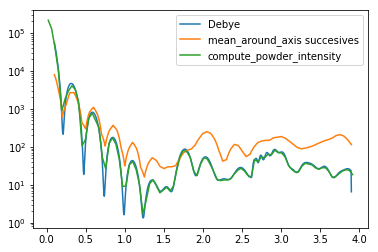

In [21]:
plt.semilogy(Q_debye, I_debye, label='Debye')
plt.semilogy(Q_debye,Ifun_powderxyz((Q_debye,0,0))/8000, label='mean_around_axis succesives')
Q,I = drx3d.compute_powder_intensity(Ifun)
plt.semilogy(Q,I/8000, label='compute_powder_intensity')
plt.legend()